## Example 8.5: Consider the system $\dot{x} = x + e^{-y}$ and $\dot{y} = -y$. First use qualitative arguments to obtain information about the phase portrait. Then, use the Runge-Kutta method to compute several trajectories, and plot them on the phase plane. 

First we, need to find the fixed points by solving: 

$\dot{x} = 0$, $\dot{y} =0$ simultaneously. The solution is $(x^*, y^*) = (-1, 0)$. 

The linearization about the fixed point yields:

$J = \left(\matrix{1 & -1\\ 0 & -1}\right)_* $, with characteristic equation:

$(1-\lambda)(1+\lambda) = 0$,

which implies that the eigenvalues are $\lambda_1 = 1$ and $\lambda_2 = -1$. 

The corresponding eigenvectors are then: $\mathbf{e}_1 = (1,0)$ for $\lambda_1 = 1$ and $\mathbf{e}_2 = (2,1)$ for $\lambda_2 = -1$.

The general solution *around the fixed point* at $(-1,0)$ is hence: 

$\mathbf{x}(t) = c_1 e^{t} \left(\matrix{1 \\ 0}\right) + c_2 e^{-t} \left(\matrix{2 \\ 1}\right)$. 

We expect solutions in the direction of $\mathbf{e}_2 = (2,1)$ to decay fast and along $\mathbf{e}_1 = (1,0)$ to go to infinity. 

Let's examine this with the Runge-Kutta method! We will use the built-in SciPy function, but feel free to use your own implementation of the algorithm. 

Note that to be able to draw trajectories, we will need to pick several initial conditions. 

In [5]:
import scipy
import numpy as np

# the name of the function is: 
# scipy.integrate.solve_ivp, which by default uses the Runge-Kutta "45" method,
# a modified version of the Runge-Kutta 4-th order algo that has a variable step size. 

# first define the function vector
# x is a vector here! t is necessary as well, but our function does not depend on time here
def func(t, y): 
    """Returns the function vector"""
    return [y[0] + np.exp(-y[1]), -y[1]]
    
# get the solutions for a single initial condition as a test:  
y0 = [1,0]
tmax = 10
sol = scipy.integrate.solve_ivp(func, [0,tmax], y0)
# print: 
print(sol.y)
print(sol.t)

# x(t): sol.y[0] vs sol.t

# y(t): sol.y[1] vs sol.t

[[1.00000000e+00 1.19563025e+00 4.48293947e+00 1.82504001e+01
  7.93806402e+01 3.65253086e+02 1.74070346e+03 8.45365678e+03
  4.14444171e+04 4.39891923e+04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
[ 0.          0.09332195  1.00847698  2.2643862   3.69376224  5.21055809
  6.77016814  8.35037646  9.9404106  10.        ]


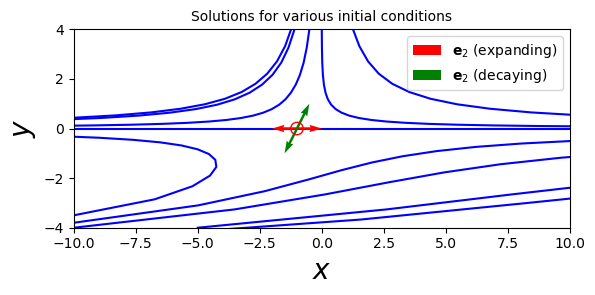

In [37]:
# Now get the solution for several initial conditions:
y0array = [[-0.94,0], [-1.06, 0], [-1.1, 4], [-0.5, 4], [-5, -4], [-10, -4], [0,4], [1,5], [-10,-3.8], [-10,-3.5], [-0.99, 5], [-10,-4.5]]
solarray = []
tmax = 10
t_eval = np.linspace(0, tmax)
t_range = (0, tmax)
for y0 in y0array:
    solarray.append(scipy.integrate.solve_ivp(func, t_range, y0, t_eval=t_eval))

# And then plot!

import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np

fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$x$', fontsize=20) # set the x label
ax.set_ylabel(r'$y$', fontsize=20) # set the y label
ax.set_title('Solutions for various initial conditions', fontsize=10) # set the title 

# set the x and y limits:
ax.set_xlim(-10,10)
ax.set_ylim(-4,4)

# make one-dimensional plots using the above arrays, add a custom label, linestyles and colors:
for i in range(len(y0array)):
    ax.plot(solarray[i].y[0], solarray[i].y[1], color='blue', linestyle='-')

# plot the fixed point: 
xfps = [-1]
yfps = [0]
plt.scatter(xfps, yfps, s=80, facecolors='none', edgecolors='r', zorder=11)

# Vector origin location 
X = [-1, -1] 
Y = [0, 0] 
# Directional vectors 
# e1
U1 = [1, -1]
V1 = [0, 0]
# e2
U2 = [0.5, -0.5]   
V2 = [1, -1]   
# Creating plot 
plt.quiver(X, Y, U1, V1, color='r', units='xy', scale=1, zorder=10, width=0.1, label=r'$\mathbf{e}_2$ (expanding)') 
plt.quiver(X, Y, U2, V2, color='g', units='xy', scale=1, zorder=10, width=0.1, label=r'$\mathbf{e}_2$ (decaying)') 



# the axes:
ax.set_aspect(1)
#ax.axhline(y=0, color='k', zorder=10, alpha=0.5)
#ax.axvline(x=0, color='k', zorder=10, alpha=0.5)

ax.legend()

plt.show() # show the plot here